## Regressão Linear com múltiplas variáveis

Este trabalho consiste na implementação da regressão linear por meio do Gradiente Descendente e da solução analítica (matricial), desenvolvido em Python.
O dataset foi obtido através do repositório de dados da Universidade da Califórnia Irvine para problemas de Machine Learning através do link (https://archive.ics.uci.edu/ml/index.php). Os dados escolhidos referem-se a vinhos brancos avaliados por 11 características (features), contando com 4.898 exemplos, cada um com sua respectiva qualidade avaliada (target).
Foi utilizado 70% (3.428 primeiros exemplos) dos dados para realizar o treinamento do modelo, e os outros 30% (1.470 exemplos restantes) para validação (testes).
A seguir, veremos a implementação e os resultados obtidos.

### Implementação do LMSTrainer() para fit e predição:

In [200]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.function_base import gradient
import pandas as pd
from random import uniform

class LMSTrainer():
    def __init__(self, analitc=False):
        self.analitic = analitc
        self.trained = False
        self.wModel = []

    def predict(self, X_test):
        y_preticted = costs = np.zeros(len(X_test))
        index = 0
        if not self.trained:
            raise RuntimeError("You must train classifer before predicting data!")
        else:
            return X_test@self.wModel.T

    def cost(self, w, x, y):
        erro = (x@w.T - y)
        costs = np.sum(np.power(erro,2))
        return costs/len(x)

    def fitGradiente(self, x, y, numFeatures, alpha=0.1, epoch=50):
        costs = np.zeros(epoch)
        w = np.random.rand(1,numFeatures+1)
        for i in range(epoch):
            w = w - (alpha/len(x)) * np.sum((x@w.T - y)*x, axis=0)
            costs[i] = self.cost(w, x, y)
        self.trained = True
        self.wModel = w
        return costs
    
    def fitAnalitic(self, x, y):
        xTx = np.matmul(x.T, x)
        try:
            xTx_Inv = np.linalg.inv(xTx)
        except np.linalg.LinAlgError:
            print("Can't perform analytic solution")
        else:
            xTx_Inv_xT = np.matmul(xTx_Inv, x.T)
            self.wModel = (xTx_Inv_xT@y).T
            self.trained = True

#função que insere uma coluna de números 1 na matriz de features
def insert_ones(X):
    ones = np.ones([X.shape[0],1])
    return np.concatenate((ones,X), axis=1)

### Carregando o dataset:

In [201]:
#Carregando o dataset
data = pd.read_csv("wineQualityWhite.csv")

#normalizando os dados
(data - data.mean())/data.std()
dataset = (data-data.min())/(data.max()-data.min())

#Definindo dados para treinamento
xTraining = np.array(dataset.iloc[0:3428, 0:11])
xTraining = insert_ones(xTraining)
yTraining = dataset.iloc[0:3428, 11:12].values

### Definindo a quantidade de épocas (iterações) e o alfa (taxa de aprendizado):

In [202]:
alpha = 0.05
epoch = 1000

### Criando uma classe de LMSTrainer e realizando o fit pelo Gradiente Descendente:

In [224]:
lms = LMSTrainer()
cost = lms.fitGradiente(xTraining,yTraining,11, alpha,epoch)

### Erro durante as iterações

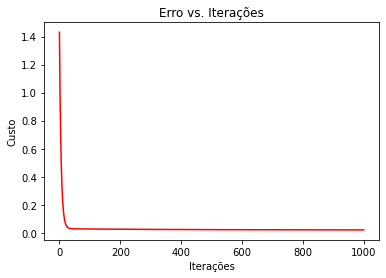

In [225]:
fig, ax = plt.subplots()  
ax.plot(np.arange(epoch), cost, 'r')  
ax.set_xlabel('Iterações')  
ax.set_ylabel('Custo')  
ax.set_title('Erro vs. Iterações')
plt.show()

### O modelo encontrado (w):

In [226]:
print(lms.wModel)

[[ 0.15142573 -0.06597012 -0.03240737  0.07275966 -0.06960814  0.52409065
   0.44808364  0.00728584  0.4746558   0.01535429  0.15661742  0.44702042]]


### Definindo os dados para teste:

In [227]:
xTest = np.array(dataset.iloc[3428:, 0:11])
xTest = insert_ones(xTest)
yTest = dataset.iloc[3428:, 11:12].values

### Erro médio para o treino:

In [228]:
errorTraining = lms.cost(lms.wModel, xTraining, yTraining)
print("Erro treino: ", errorTraining)

Erro treino:  0.020390498540523914


### Erro médio para os dados de teste:

In [229]:
errorTest = lms.cost(lms.wModel, xTest, yTest)
print("Erro teste: ", errorTest)

Erro teste:  0.01911573821522372


### Encontrando um modelo de forma analítica:

In [230]:
lms_analytic = LMSTrainer()
lms_analytic.fitAnalitic(xTraining,yTraining)

### O modelo encontrado de forma analítica:

In [231]:
print(lms_analytic.wModel)

[[ 0.34127621 -0.12009128 -0.29719372 -0.01466031  0.25814666 -0.0440674
   0.27740696 -0.06145024 -0.02272852  0.04281557  0.08485237  0.40665662]]


### Erro médio do modelo analítico para os dados de treinamento:

In [232]:
errorTrainingAnalytic = lms_analytic.cost(lms_analytic.wModel, xTraining, yTraining)
print("Erro treino: ", errorTrainingAnalytic)

Erro treino:  0.016685989115741283


### Erro médio do modelo analítico para os dados de teste:

In [233]:
errorTestAnalytic = lms_analytic.cost(lms_analytic.wModel, xTest, yTest)
print("Erro teste: ", errorTestAnalytic)

Erro teste:  0.01436808910708202
